## **OJECTIVE : The main goal of this notebook is to explore the working of Fast-NST.**

Early versions of NST treated the task as an optimization problem, requiring hundreds or thousands of iterations to perform style transfer on a single image. To tackle this inefficiency, researchers developed what’s referred to as "fast neural style transfer". Fast style transfer also uses deep neural networks but trains a standalone model to transform any image in a single, feed-forward pass. Trained models can stylize any image with just one iteration through the network, rather than thousands.

**NOTE** : The model works fine for '.jpg' and '.png' images but may throw error for other extensions.

In [ ]:
import functools
import os
from matplotlib import gridspec
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub

print("TF Version: ", tf.__version__)
print("TF Hub version: ", hub.__version__)
print("Eager mode enabled: ", tf.executing_eagerly())
print("GPU available: ", tf.config.list_physical_devices('GPU'))


TF Version:  2.17.0
TF Hub version:  0.16.1
Eager mode enabled:  True
GPU available:  []


In [ ]:
content_image_path = "/content/dainty.jpg"
style_image_path = "/content/download.jpg"

# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)

# saving the original images in another var,so that we can compare at the end.
content_image_ = plt.imread(content_image_path)
style_image_ = plt.imread(style_image_path)

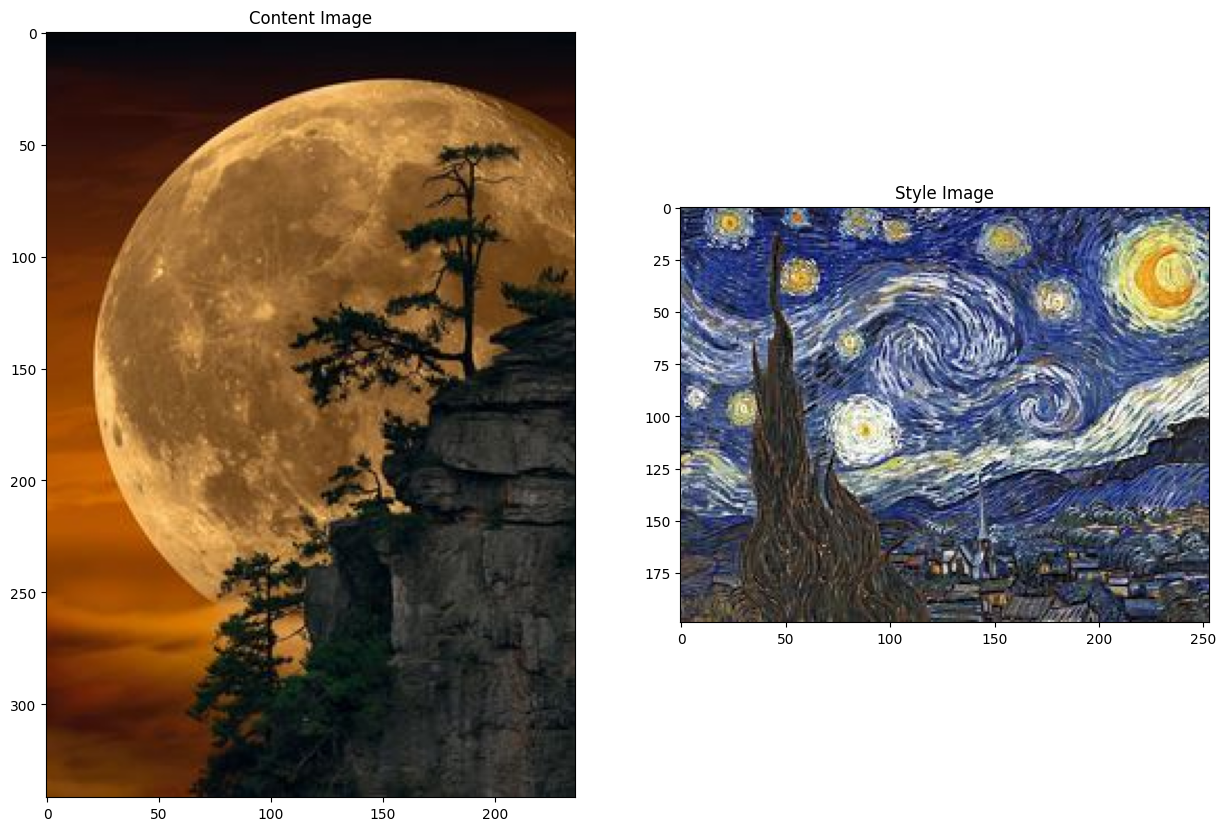

In [ ]:
plt.figure(figsize=(15,15))

# displaying the content image
plt.subplot(1,2,1)
plt.imshow(content_image)
plt.title("Content Image")

# displaying the style image
plt.subplot(1,2,2)
plt.imshow(style_image)
plt.title("Style Image")

plt.show()



In [ ]:

# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

In [ ]:
# Load image stylization model from TF hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

In [ ]:
# shape of stylized_image
stylized_image.shape

TensorShape([1, 344, 236, 3])

In [ ]:
stylized_image = np.array(stylized_image)

# reshape the stylized image
stylized_image = stylized_image.reshape(stylized_image.shape[1],stylized_image.shape[2],stylized_image.shape[3])

stylized_image.shape

(344, 236, 3)

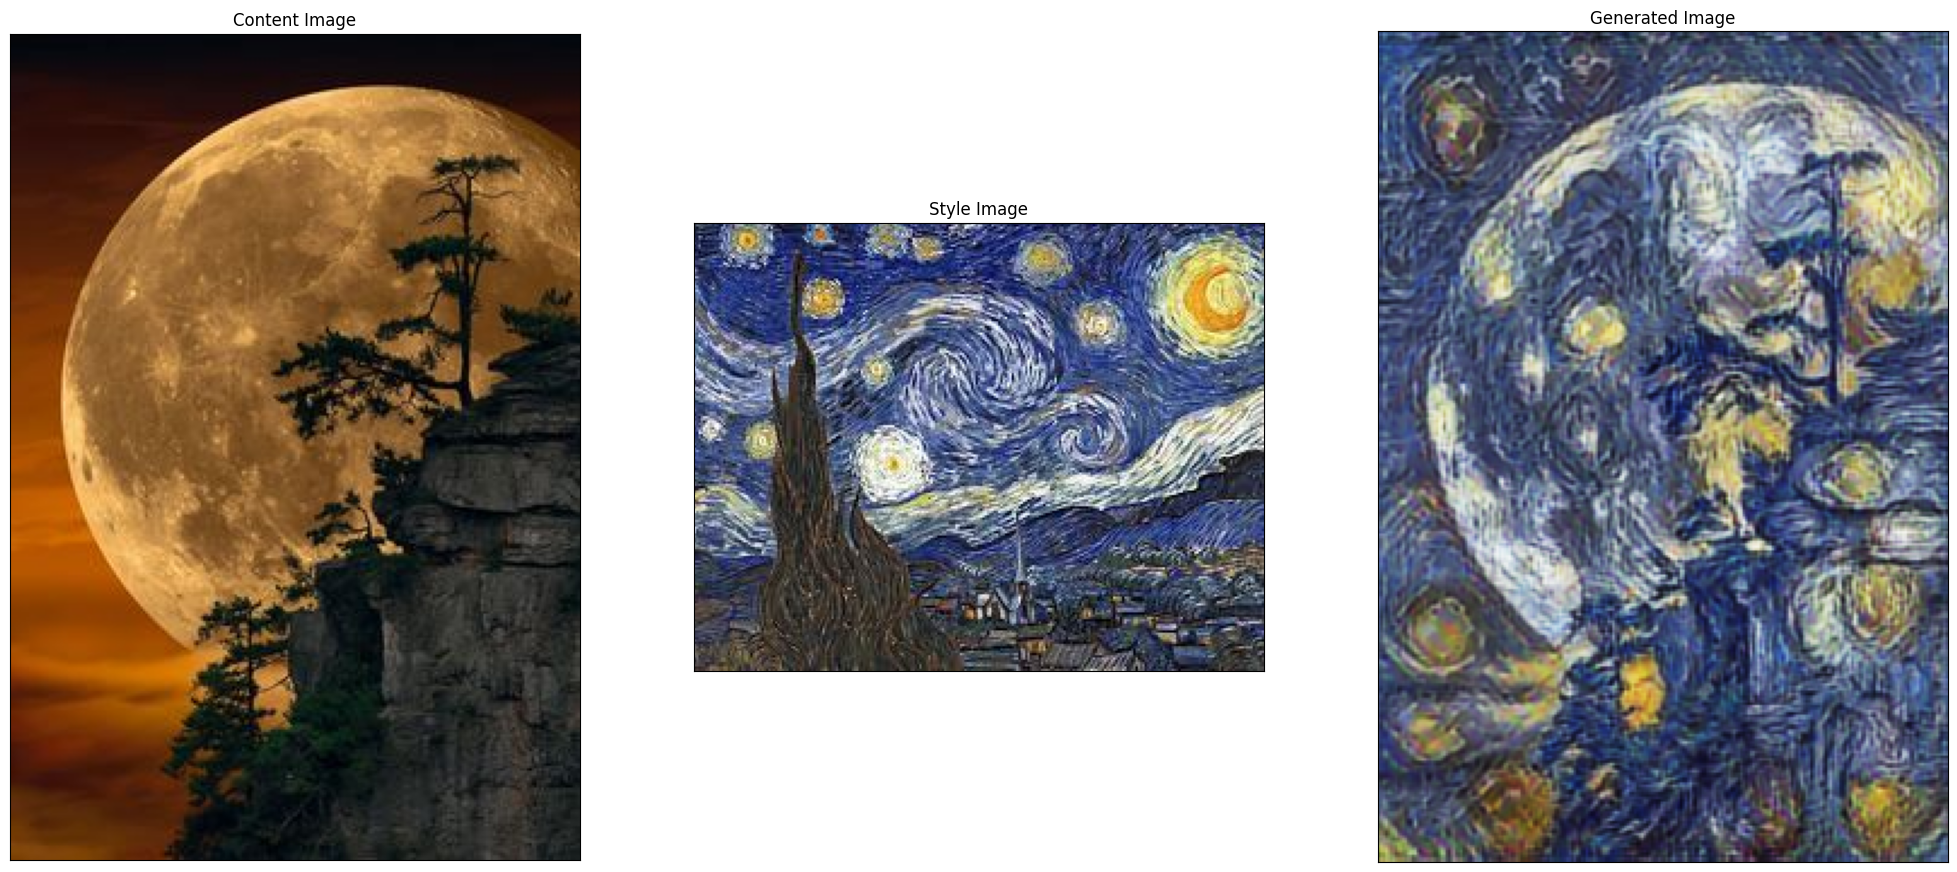

In [ ]:
# plotting all 3 images side by side.

plt.figure(figsize=(25,30))

# displaying the content image
plt.subplot(1,3,1)
plt.imshow(content_image_)
plt.title("Content Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# displaying the style image
plt.subplot(1,3,2)
plt.imshow(style_image_)
plt.title("Style Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# displaying the stylized image
plt.subplot(1,3,3)
plt.imshow(stylized_image)
plt.title("Generated Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Saving the figure.
plt.savefig("Combo1.png",transparent=True)
plt.show()

## **Let's create boilerplate code and generate multiple images**

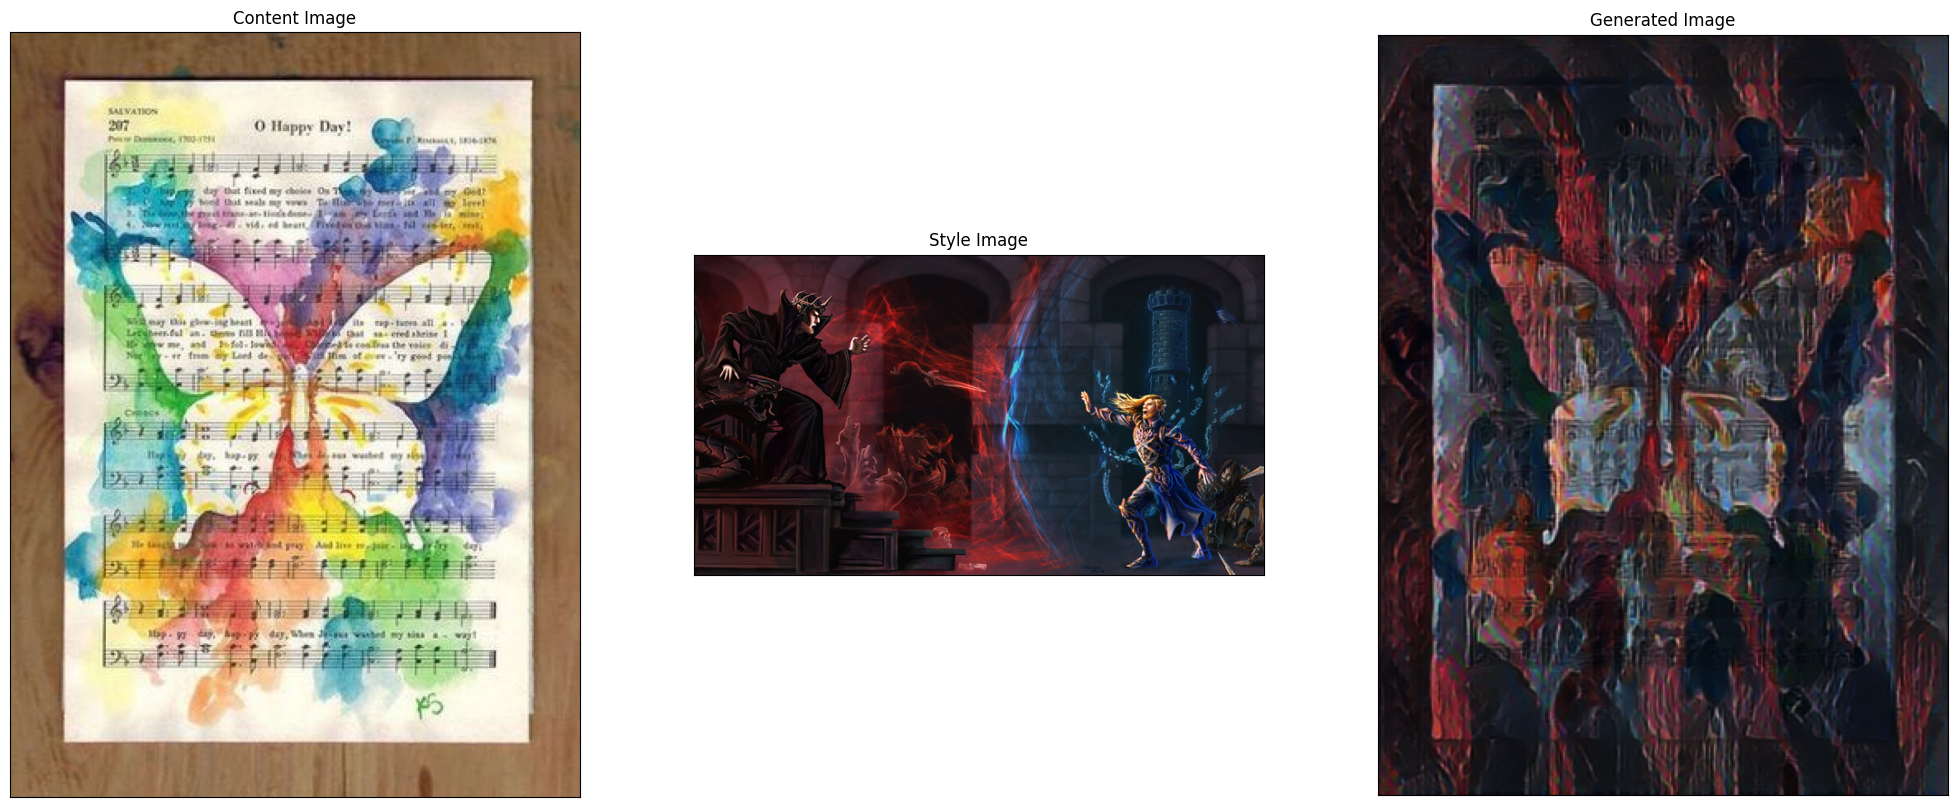

In [ ]:

content_image_path = "/content/music.jpg"
style_image_path = "/content/sauron(1).jpg"
# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)

# saving the original images in another var,so that we can compare at the end.
content_image_ = plt.imread(content_image_path)
style_image_ = plt.imread(style_image_path)

# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

stylized_image = np.array(stylized_image)

# reshape the stylized image
stylized_image = stylized_image.reshape(stylized_image.shape[1],stylized_image.shape[2],stylized_image.shape[3])

#-------------------------------------

# plotting all 3 images side by side.
plt.figure(figsize=(25,30))

# displaying the content image
plt.subplot(1,3,1)
plt.imshow(content_image_)
plt.title("Content Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# displaying the style image
plt.subplot(1,3,2)
plt.imshow(style_image_)
plt.title("Style Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# displaying the stylized image
plt.subplot(1,3,3)
plt.imshow(stylized_image)
plt.title("Generated Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Saving the figure.
plt.savefig("Combo2.png",transparent=True)
plt.show()


### **Generating Images**

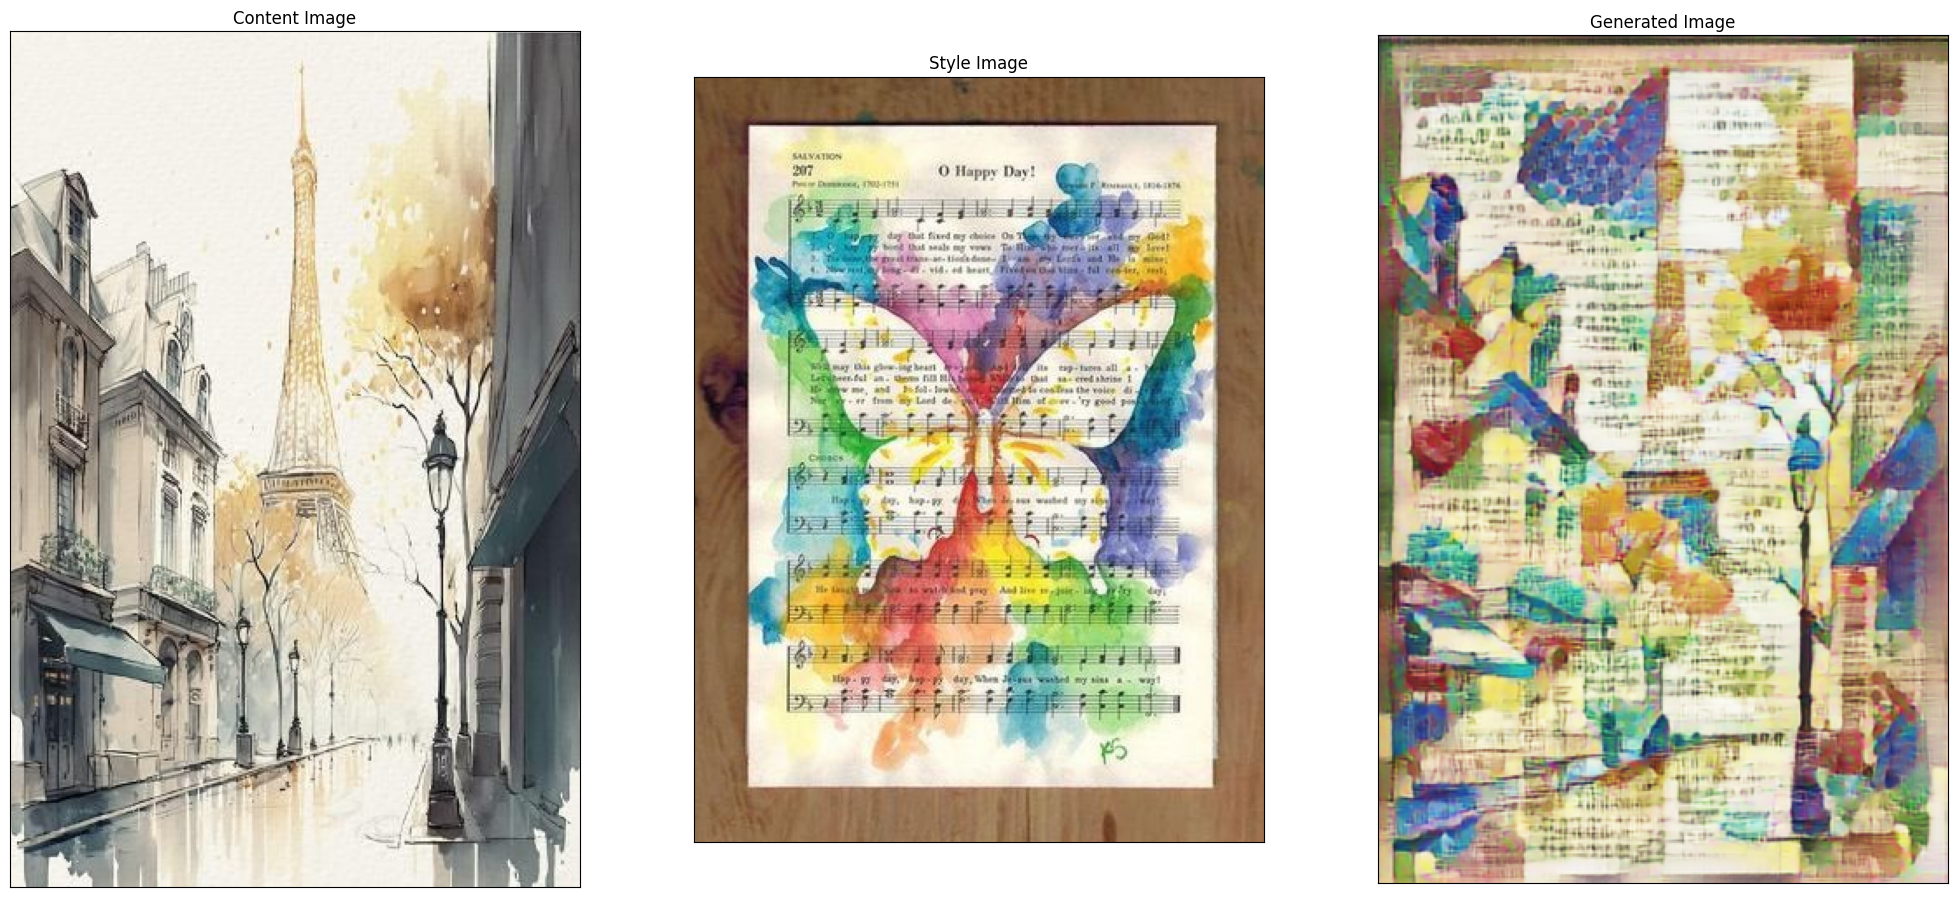

In [ ]:

content_image_path = "/content/view.jpg"
style_image_path = "/content/music.jpg"

# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)

# saving the original images in another var,so that we can compare at the end.
content_image_ = plt.imread(content_image_path)
style_image_ = plt.imread(style_image_path)

# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

stylized_image = np.array(stylized_image)

# reshape the stylized image
stylized_image = stylized_image.reshape(stylized_image.shape[1],stylized_image.shape[2],stylized_image.shape[3])

#-------------------------------------

# plotting all 3 images side by side.
plt.figure(figsize=(25,30))

# displaying the content image
plt.subplot(1,3,1)
plt.imshow(content_image_)
plt.title("Content Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# displaying the style image
plt.subplot(1,3,2)
plt.imshow(style_image_)
plt.title("Style Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# displaying the stylized image
plt.subplot(1,3,3)
plt.imshow(stylized_image)
plt.title("Generated Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Saving the figure.
plt.savefig("Combo3.png",transparent=True)
plt.show()


In [ ]:

content_image_path = "/content/binary.jpg"
style_image_path = "/content/sauron.jpg"

# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)

# saving the original images in another var,so that we can compare at the end.
content_image_ = plt.imread(content_image_path)
style_image_ = plt.imread(style_image_path)

# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

stylized_image = np.array(stylized_image)

# reshape the stylized image
stylized_image = stylized_image.reshape(stylized_image.shape[1],stylized_image.shape[2],stylized_image.shape[3])

#-----------------------------------

# plotting all 3 images side by side.
plt.figure(figsize=(25,30))

# displaying the content image
plt.subplot(1,3,1)
plt.imshow(content_image_)
plt.title("Content Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# displaying the style image
plt.subplot(1,3,2)
plt.imshow(style_image_)
plt.title("Style Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# displaying the stylized image
plt.subplot(1,3,3)
plt.imshow(stylized_image)
plt.title("Generated Image")
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Saving the figure.
plt.savefig("Combo4.png",transparent=True)
plt.show()


InvalidArgumentError: Graph execution error:

Detected at node transformer/contract/MirrorPad defined at (most recent call last):
<stack traces unavailable>
The first dimension of paddings must be the rank of inputs[4,2], [1,354,236]
	 [[{{node transformer/contract/MirrorPad}}]] [Op:__inference_pruned_38661]